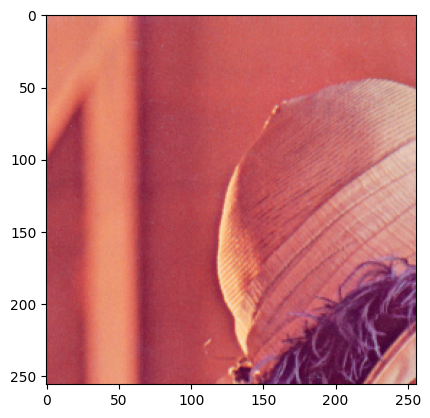

In [1]:
import cv2
import sys
import os
import matplotlib.pyplot as plt

IMG_PATH = "data" 
img =cv2.imread(os.path.join(IMG_PATH, "lena.png"))
#cv2 BGR , plt RGB -> convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

#image crop upper left half using numpy slicing
img_crop = img_rgb[:256, :256]  #image size 512x512
plt.imshow(img_crop)
plt.show()

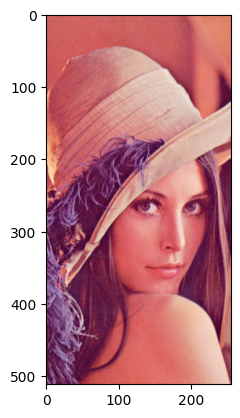

In [43]:
#center half crop
img_crop = img_rgb[0:512, 128:384] #x 위 아래, y 좌 우
plt.imshow(img_crop)
plt.show()

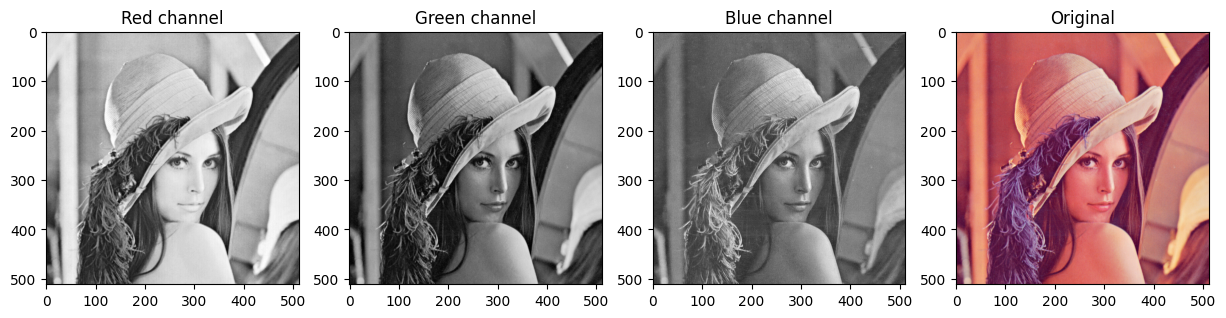

In [42]:
#RGB channel split
r, g, b = cv2.split(img_rgb)
#subplot 으로 한번에 표시
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title("Red channel")
plt.imshow(r, cmap="gray")
plt.subplot(142)
plt.title("Green channel")
plt.imshow(g, cmap="gray")
plt.subplot(143)
plt.title("Blue channel")
plt.imshow(b, cmap="gray")
plt.subplot(144)
plt.title("Original")
plt.imshow(img_rgb,cmap="gray")

plt.show()
#각 channel에서 어떻게 표현되는지 비교하면서 확인해보기

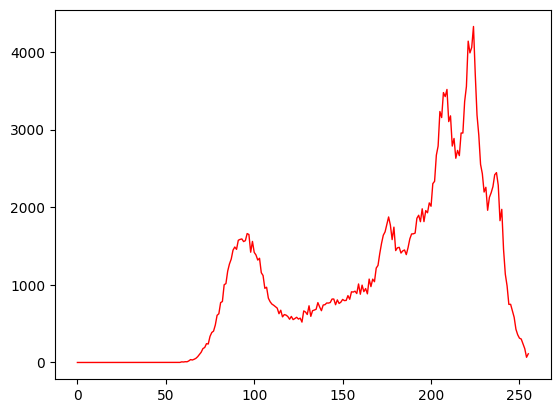

In [41]:
#히스토그램을 통한 이진화
#이진화를 사용하는 이유 
#Grayscale 영상 -> Thresholding -> Binary 영상
import cv2
import matplotlib.pyplot as plt

img =cv2.imread(os.path.join(IMG_PATH, "lena.png"))
red_hist = cv2.calcHist([img], [2], None, [256], [0, 256]) #cv2 BGR -> R [2]
plt.plot(red_hist, color='r',linewidth=1)
plt.show()

Otus's Threshold:  161.0


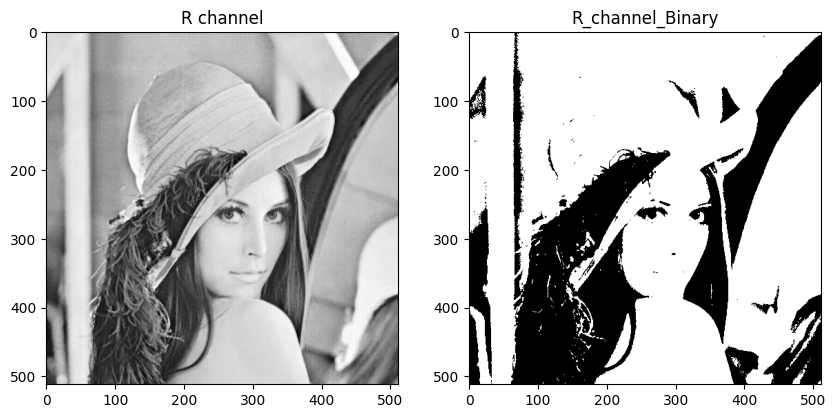

In [40]:
#오츄 알고리즘 -> Thresholding value를 최적화 문제로 풀어서 목적함수 J 를 계산하여 최소인 명암값을 최적값으로 구하는 것

import cv2
import sys

img = cv2.imread(os.path.join(IMG_PATH, "lena.png"))

Threshold, binary_img = cv2.threshold(img[:,:,2], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #오츄 알고리즘을 사용한 이진화
print("Otus's Threshold: ", Threshold) # R_channel의 threshold 값


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("R channel")
plt.imshow(img[:,:,2], cmap="gray")
plt.subplot(122)
plt.title("R_channel_Binary")
plt.imshow(binary_img, cmap="gray") #R channel을 이용한 이진화 이미지 출력
plt.show()

(176, 640, 4)


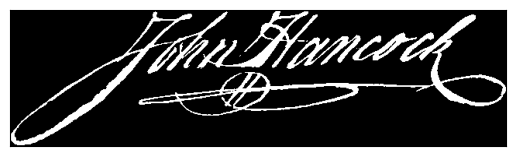

In [38]:
#연결 요소, 모폴로지
#4-연결성, 8-연결성
#모폴로지 연산 -> 팽창, 침식, 열림, 닫힘
#각 모폴로지 연산이 어떻게 진행되는지 과정 확인하기
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img = cv2.imread(os.path.join(IMG_PATH, "JohnHancockSignature.png"), cv2.IMREAD_UNCHANGED) #png ->  UNCHANGES -> 4 channel로 읽어옴 (RGBA)
print(img.shape) # (height, width, channel) , Channel 4 -> RGBA
Threshold, binary_img = cv2.threshold(img[:,:,3], 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(binary_img, cmap="gray"),plt.xticks([]),plt.yticks([])
plt.show()

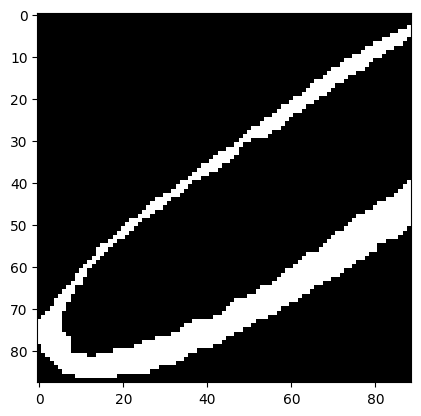

In [39]:
bin = binary_img[binary_img.shape[0]//2:binary_img.shape[0], 0:binary_img.shape[0]//2+1]
plt.imshow(bin,cmap='gray')
plt.show()

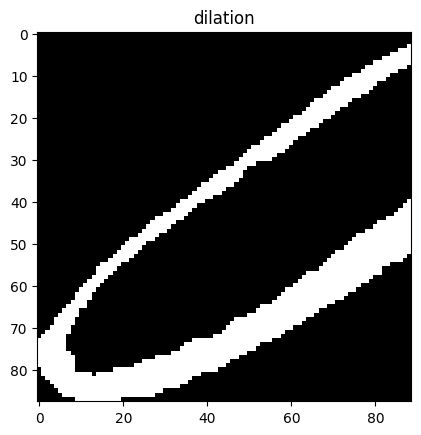

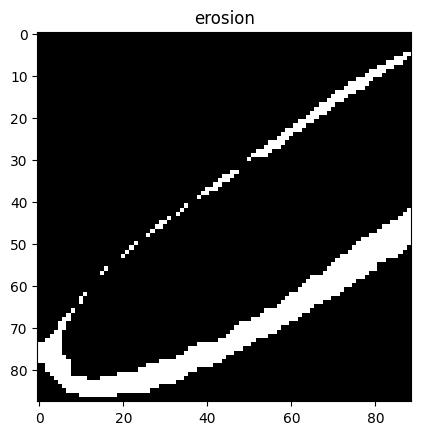

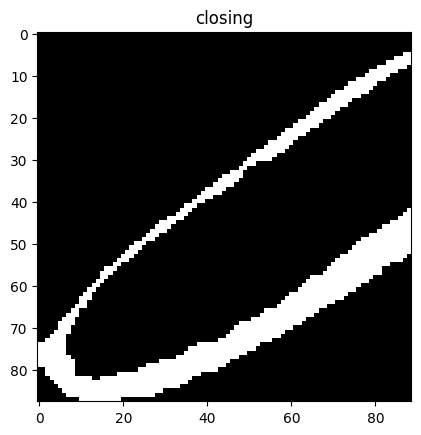

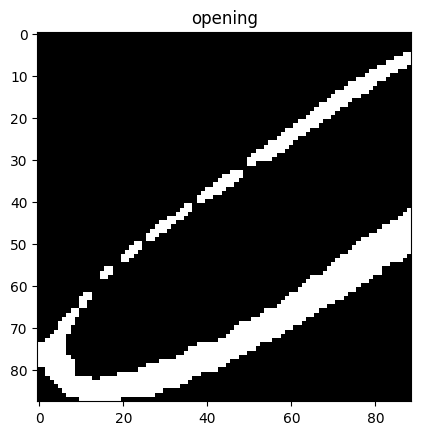

In [57]:
#구조요소 se
se = np.ones((2,2), np.uint8)

bin_dilation = cv2.dilate(bin, se, iterations=1)
plt.title("dilation")
plt.imshow(bin_dilation, cmap='gray')
plt.show()

bin_erosion = cv2.erode(bin, se, iterations=1)
plt.title("erosion")
plt.imshow(bin_erosion, cmap='gray')
plt.show()

bin_closing = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, se)
plt.title("closing")
plt.imshow(bin_closing, cmap='gray')
plt.show()

bin_opening = cv2.morphologyEx(bin, cv2.MORPH_OPEN, se)
plt.title("opening")
plt.imshow(bin_opening, cmap='gray')
plt.show()




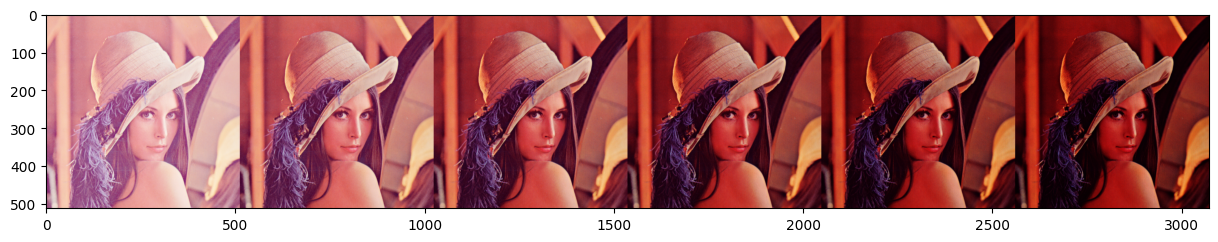

In [61]:
#감마 보정 , lena를 이요해서 실습
#gamma 값은 0.5부터 3.0 까지 0.5씩 증가시키면서 이미지를 출력해보기
#hstack으로 합치기
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(IMG_PATH, "lena.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gamma = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
gamma_img = [np.power(img/255., g) for g in gamma]
#hstack으로 이미지를 합치기
result = np.hstack(gamma_img)
plt.figure(figsize=(15,5))
plt.imshow(result)
plt.show()

#왜 그런지 감마 곡선 보여주면서 설명해주기 contrast




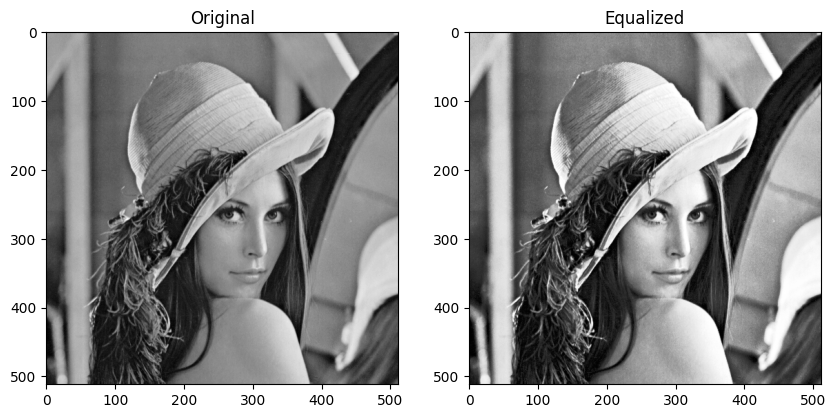

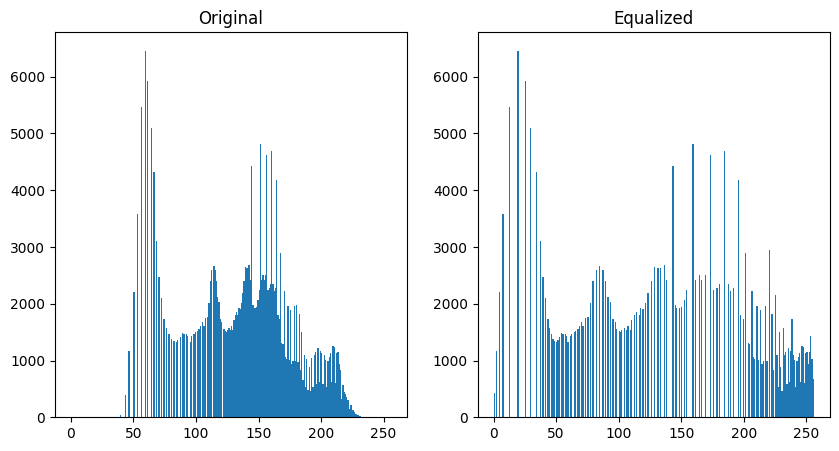

In [62]:
#히스토그램 평활화
#히스토그램 평활화를 이용하여 이미지의 대비를 향상시키기
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(IMG_PATH, "lena.png"), cv2.IMREAD_GRAYSCALE)
equalized_img = cv2.equalizeHist(img)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.title("Equalized")
plt.imshow(equalized_img, cmap="gray")
plt.show()
#histogram 확인하기
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Original")
plt.hist(img.ravel(), 256, [0, 256])
plt.subplot(122)
plt.title("Equalized")
plt.hist(equalized_img.ravel(), 256, [0, 256])
plt.show()



<class 'numpy.uint8'>


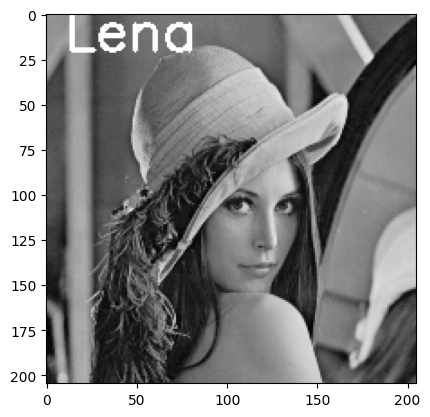

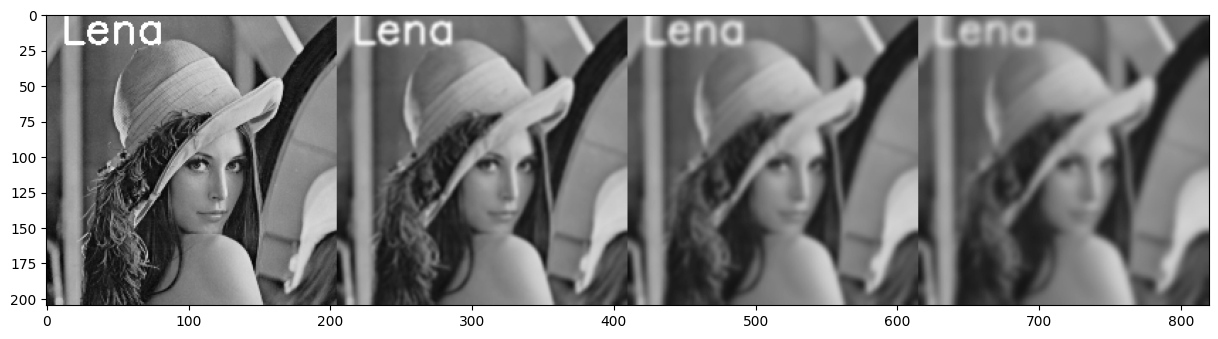

In [13]:
#convolution , weighted sum
#filter, kernel
#convolution 연산을 통해 이미지를 필터링하기
#padding
#filter 구성 보고 어떤 역할의 필터인지 직관적으로 파악하기

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(IMG_PATH, "lena.png"))
print(type(img[0,0,0])) #하나의 픽셀은 0~255 사이의 값으로 구성되어 있음, 1바이트 (8bit) 

img = cv2.resize(img,dsize=(0,0),fx=0.4,fy=0.4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.putText(gray, "Lena", (10,20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
plt.imshow(gray,cmap='gray')
plt.show()

smooth= np.hstack([gray, cv2.GaussianBlur(gray, (5,5), 0),
                   cv2.GaussianBlur(gray, (9,9), 0),
                   cv2.GaussianBlur(gray, (13,13), 0)])
plt.figure(figsize=(15,5))
plt.imshow(smooth, cmap='gray')
plt.show()


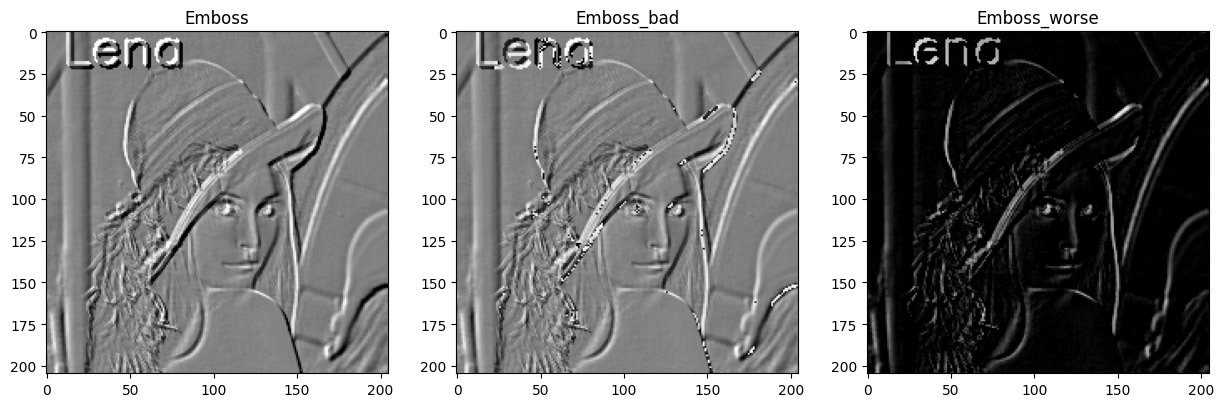

In [17]:
femboss = np.array([[-1,0,0],
                    [0,0,0],
                    [0,0,1.0]])

gray16 = np.int16(gray)
emboss = np.uint8(np.clip(cv2.filter2D(gray16, -1, femboss)+128,0,255))
emboss_bad = np.uint8((cv2.filter2D(gray16, -1, femboss)+128))
emboss_worse = cv2.filter2D(gray,-1,femboss)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Emboss")
plt.imshow(emboss, cmap='gray')
plt.subplot(132)
plt.title("Emboss_bad")
plt.imshow(emboss_bad, cmap='gray')

plt.subplot(133)
plt.title("Emboss_worse")
plt.imshow(emboss_worse, cmap='gray')
plt.show()


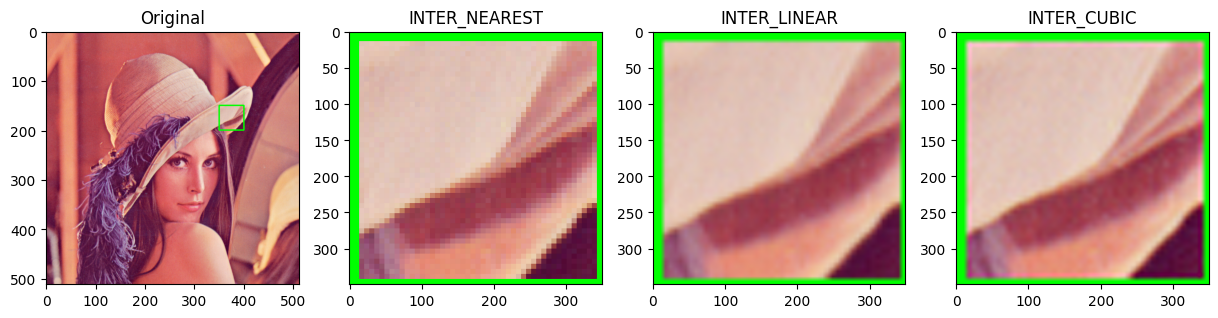

In [25]:
#geometry transformation
#각 보간 방법 특징 알기
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(os.path.join(IMG_PATH, "lena.png"))

patch = img[150:200, 350:400]

img = cv2.rectangle(img, (350,150), (400,200), (0,255,0), 2)
patch1 = cv2.resize(patch,dsize= (0,0),fx=7,fy=7, interpolation=cv2.INTER_NEAREST)
patch2 = cv2.resize(patch, dsize= (0,0),fx=7,fy=7, interpolation=cv2.INTER_LINEAR)
patch3 = cv2.resize(patch,dsize= (0,0),fx=7,fy=7, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(142)
plt.title("INTER_NEAREST")
plt.imshow(cv2.cvtColor(patch1, cv2.COLOR_BGR2RGB))
plt.subplot(143)
plt.title("INTER_LINEAR")
plt.imshow(cv2.cvtColor(patch2, cv2.COLOR_BGR2RGB))
plt.subplot(144)
plt.title("INTER_CUBIC")
plt.imshow(cv2.cvtColor(patch3, cv2.COLOR_BGR2RGB))
plt.show()

#화질 비교해보기

In [26]:
#for 중첩 VS numpy 연산 속도 비교해보기

for loop:  0.001973867416381836
